# Chp 7. Working with Keras: a deep dive

In [7]:
# Sequential class
def listing7_1():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    print(model)

listing7_1()

In [11]:
# Sequential class, incrementally building
def listing7_2():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    
    model = keras.Sequential()
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    print(model)
    
listing7_2()

In [26]:
def listing7_3():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    
    model = keras.Sequential()
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    # None specifies batch size
    model.build(input_shape=(None, 3))
    
    print(model.weights[0][0][:10])
    
    print(model.summary())
    
listing7_3()

tf.Tensor(
[ 0.16626397 -0.03623223  0.01804212 -0.28968063 -0.12478794  0.17058921
 -0.29610103  0.02492359 -0.19764721 -0.25017804], shape=(10,), dtype=float32)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# Specifying the input shape of model in advance
# GB: This is the most explicit style, stick to this!
def listing7_7():
    from tensorflow import keras
    from tensorflow.keras import layers
    
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(3,)))
    model.add(layers.Dense(64, activation='relu'))
    
    model.summary()
    
listing7_7()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


# 7.2.2 Functional API

In [47]:
def listing7_8():
    from tensorflow import keras
    from tensorflow.keras import layers
    
    inputs = keras.Input(shape=(3,), name="my_input")
    features = layers.Dense(64, activation="relu")(inputs)
    outputs = layers.Dense(10, activation="softmax")(features)
    
    # instantiate model
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    model.summary()    
    
listing7_8()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_70 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [79]:
# multi-input, multi-output Functional model
def listing7_9():
    from tensorflow import keras
    from tensorflow.keras import layers
    
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
    # define model inputs
    title = keras.Input(shape=(vocabulary_size,), name="title")
    text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
    tags = keras.Input(shape=(num_tags,), name="tags")
    
    # combine input features into a single tensor, called features
    features = layers.Concatenate()([title, text_body, tags])
    # apply intermediate layer to recombine input features into richer representation
    features = layers.Dense(64, activation="relu")(features)
    
    print(features)
    
    # model output 1
    priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
    # model output 2
    department = layers.Dense(
        num_departments,
        activation="softmax",
        name="department"
    )(features)
    
    # create model
    model = keras.Model(
        inputs=[title, text_body, tags],
        outputs=[priority, department]
    )
    
    print()
    model.summary()
    
listing7_9()

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_95/Relu:0', description="created by layer 'dense_95'")

Model: "model_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate_24 (Concatenate)    (None, 20

In [80]:
# multi-input, multi-output Functional model
# training a model by providing lists of input and target arrays
def listing7_10():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    num_samples = 1280
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
    # dummy input data
    title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

    # dummy target data
    priority_data = np.random.random(size=(num_samples, 1))
    department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
    
    # define model inputs
    title = keras.Input(shape=(vocabulary_size,), name="title")
    text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
    tags = keras.Input(shape=(num_tags,), name="tags")
    
    # combine input features into a single tensor, called features
    features = layers.Concatenate()([title, text_body, tags])
    # apply intermediate layer to recombine input features into richer representation
    features = layers.Dense(64, activation="relu")(features)
    
    print(features)
    
    # model output 1
    priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
    # model output 2
    department = layers.Dense(
        num_departments,
        activation="softmax",
        name="department"
    )(features)
    
    # create model
    model = keras.Model(
        inputs=[title, text_body, tags],
        outputs=[priority, department]
    )
    
    ########################
    
    model.compile(
        optimizer="adam",
        loss=["mean_squared_error", "categorical_crossentropy"],
        metrics=[["mean_absolute_error"], ["accuracy"]]
    )
    
    model.fit(
        [title_data, text_body_data, tags_data], # X
        [priority_data, department_data], # y
        epochs=1
    )
    
    model.evaluate(
        [title_data, text_body_data, tags_data],
        [priority_data, department_data]
    )
    
    priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])
    
    print()
    print(priority_preds.shape)
    print(priority_preds)
    print()
    print(department_preds.shape)
    print(department_preds)
    
    print()
    print(f"priority predictions (class with highest probability): {np.argmax(priority_preds[0])}")
    print(f"department predictions (class with highest probability): {np.argmax(department_preds[0])}")
    
listing7_10()

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_96/Relu:0', description="created by layer 'dense_96'")
40/40 [==============================] - 0s 6ms/step - loss: 3.2102 - priority_loss: 0.0914 - department_loss: 3.1188 - priority_mean_absolute_error: 0.2580 - department_accuracy: 0.4289

(1280, 1)
[[0.38483837]
 [0.43908048]
 [0.6229955 ]
 ...
 [0.6394743 ]
 [0.6302177 ]
 [0.6329799 ]]

(1280, 4)
[[0.3072967  0.42183602 0.06501722 0.20585014]
 [0.34594557 0.43085167 0.03937715 0.18382564]
 [0.2981171  0.39865854 0.07358031 0.22964406]
 ...
 [0.28938043 0.2512263  0.05102726 0.40836588]
 [0.47896853 0.37413836 0.04195027 0.10494284]
 [0.33487624 0.29500464 0.03754456 0.33257455]]

priority predictions (class with highest probability): 0
department predictions (class with highest probability): 1


KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_114/Relu:0', description="created by layer 'dense_114'")
40/40 [==============================] - 0s 7ms/step - loss: 3.3944 - priority_loss: 0.3341 - department_loss: 3.0603 - priority_mean_absolute_error: 0.4985 - department_accuracy: 0.1586

(1280, 1)
(1280, 4)

priority predictions (class with highest probability): 0
department predictions (class with highest probability): 2


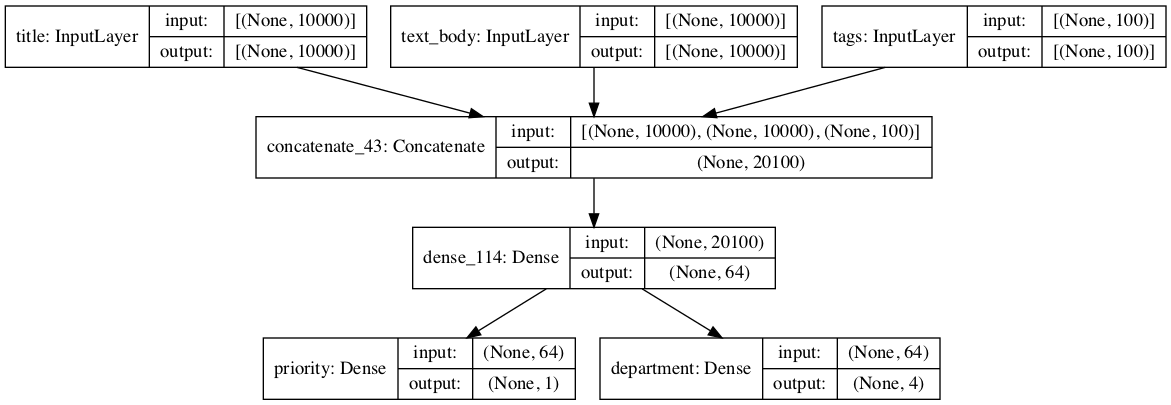


i: 0, KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'")

i: 1, KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='text_body'), name='text_body', description="created by layer 'text_body'")

i: 2, KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='tags'), name='tags', description="created by layer 'tags'")

i: 3, [<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>, <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

i: 4, KerasTensor(type_spec=TensorSpec(shape=(None, 20100), dtype=tf.float32, name=None), name='concatenate_43/concat:0', description="created by layer 'concatenate_43'")

i: 5, KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_114/Relu:0', description="created by 

In [98]:
# multi-input, multi-output Functional model
# training a model by providing lists of input and target arrays
# providing dicts of input and target arrays
def listing7_11():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    num_samples = 1280
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
    # dummy input data
    title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

    # dummy target data
    priority_data = np.random.random(size=(num_samples, 1))
    department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
    
    # define model inputs
    title = keras.Input(shape=(vocabulary_size,), name="title")
    text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
    tags = keras.Input(shape=(num_tags,), name="tags")
    
    # combine input features into a single tensor, called features
    features = layers.Concatenate()([title, text_body, tags])
    # apply intermediate layer to recombine input features into richer representation
    features = layers.Dense(64, activation="relu")(features)
    
    print(features)
    
    # model output 1
    priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
    # model output 2
    department = layers.Dense(
        num_departments,
        activation="softmax",
        name="department"
    )(features)
    
    # create model
    model = keras.Model(
        inputs=[title, text_body, tags],
        outputs=[priority, department]
    )
    
    ########################
    
    model.compile(
        optimizer="adam",
        loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
        metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]}
    )
    
    model.fit(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data}, # X
        {"priority": priority_data, "department": department_data}, # y
        epochs=1
    )
    
    model.evaluate(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data},
        {"priority": priority_data, "department": department_data}
    )
    
    priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})
    
    print()
    print(priority_preds.shape)
    print(department_preds.shape)
    print()
    print(f"priority predictions (class with highest probability): {np.argmax(priority_preds[0])}")
    print(f"department predictions (class with highest probability): {np.argmax(department_preds[0])}")
    
    
    from IPython.display import Image, display_png
    from tensorflow.keras.utils import plot_model
    png_file = './images/ticket_classifier.png'  
    
    keras.utils.plot_model(
        model, 
        png_file,
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
        rankdir='TB', #'LR',
    )
    display_png(Image(png_file))

    #################
    
    for x in model.layers:
        print(x)
    print()
    
    for i, x in enumerate(model.layers):
        print(f"i: {i}, {x.input}")
        print()
        
    print()
    
listing7_11()

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_120/Relu:0', description="created by layer 'dense_120'")
40/40 [==============================] - 1s 7ms/step - loss: 2.9296 - priority_loss: 0.3306 - department_loss: 2.5989 - priority_mean_absolute_error: 0.4961 - department_accuracy: 0.3305

(1280, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]

(1280, 4)
[[0.0263622  0.16549937 0.5572181  0.25092036]
 [0.00836922 0.0305816  0.8511087  0.10994052]
 [0.23080271 0.2559982  0.32965252 0.18354645]
 ...
 [0.10699067 0.17427886 0.43072605 0.28800446]
 [0.08574321 0.27425164 0.39297926 0.24702583]
 [0.2693562  0.11460385 0.4924974  0.12354249]]

priority predictions (class with highest probability): 0
department predictions (class with highest probability): 2



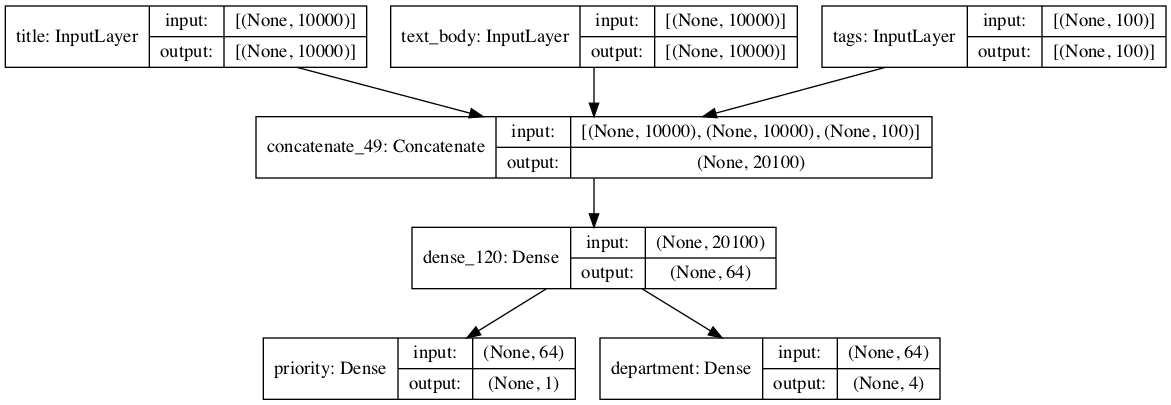

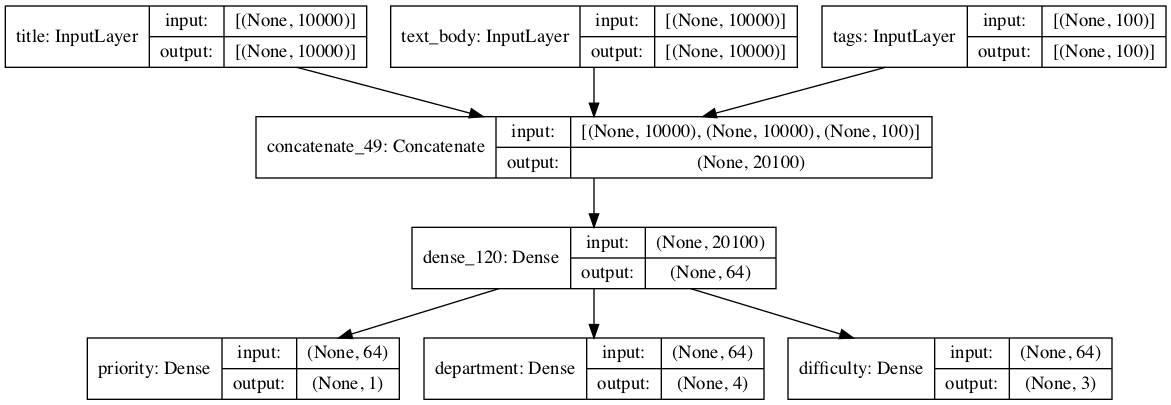

In [104]:
# multi-input, multi-output Functional model
# creating a new model by reusing intermediate layer outputs
# multi-input, multi-output Functional model
# training a model by providing lists of input and target arrays
def listing7_13():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    num_samples = 1280
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
    # dummy input data
    title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

    # dummy target data
    priority_data = np.random.random(size=(num_samples, 1))
    department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
    
    # define model inputs
    title = keras.Input(shape=(vocabulary_size,), name="title")
    text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
    tags = keras.Input(shape=(num_tags,), name="tags")
    
    # combine input features into a single tensor, called features
    features = layers.Concatenate()([title, text_body, tags])
    # apply intermediate layer to recombine input features into richer representation
    features = layers.Dense(64, activation="relu")(features)
    
    print(features)
    
    # model output 1
    priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
    # model output 2
    department = layers.Dense(
        num_departments,
        activation="softmax",
        name="department"
    )(features)
    
    # create model
    model = keras.Model(
        inputs=[title, text_body, tags],
        outputs=[priority, department]
    )
    
    ########################
    
    model.compile(
        optimizer="adam",
        loss=["mean_squared_error", "categorical_crossentropy"],
        metrics=[["mean_absolute_error"], ["accuracy"]]
    )
    
    model.fit(
        [title_data, text_body_data, tags_data], # X
        [priority_data, department_data], # y
        epochs=1
    )
    
    model.evaluate(
        [title_data, text_body_data, tags_data],
        [priority_data, department_data]
    )
    
    priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])
    
    print()
    print(priority_preds.shape)
    print(priority_preds)
    print()
    print(department_preds.shape)
    print(department_preds)
    
    print()
    print(f"priority predictions (class with highest probability): {np.argmax(priority_preds[0])}")
    print(f"department predictions (class with highest probability): {np.argmax(department_preds[0])}")
    print()
        
        
    from IPython.display import Image, display_png
    from tensorflow.keras.utils import plot_model
        
    png_file = './images/ticket_classifier.png'  
    keras.utils.plot_model(
        model, 
        png_file,
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
        rankdir='TB', #'LR',
    )
    display_png(Image(png_file))
    print()
    print()
    
    ###################################
        
    features = model.layers[4].output
    difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
    
    new_model = keras.Model(
        inputs = [title, text_body, tags],
        outputs = [priority, department, difficulty]
    )
        
    png_file = './images/updated_ticket_classifier.png'  
    keras.utils.plot_model(
        new_model, 
        png_file,
        show_shapes=True,
        show_layer_names=True,
        dpi=96,
        rankdir='TB', #'LR',
    )
    display_png(Image(png_file))
        
        
listing7_13()

In [115]:
# simple subclassed model
def listing7_14():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    # define model
    class CustomerTicketModel(keras.Model):
        def __init__(self, num_departments):
            # super constructor
            super().__init__()
            # define sublayers in constructor
            self.concat_layer = layers.Concatenate()
            self.mixing_layer = layers.Dense(64, activation="relu")
            self.priority_scorer = layers.Dense(1, activation="sigmoid")
            self.department_classifier = layers.Dense(
                num_departments, activation="softmax"
            )
            
        # define forwards pass in the call() method
        def call(self, inputs):
            title = inputs["title"]
            text_body = inputs["text_body"]
            tags = inputs["tags"]
            features = self.concat_layer([title, text_body, tags])
            features = self.mixing_layer(features)
            priority = self.priority_scorer(features)
            department = self.department_classifier(features)
            return priority, department
            
        
        
    num_samples = 1280
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
   
    num_samples = 1280
    vocabulary_size = 10_000
    num_tags = 100
    num_departments = 4
    
    # dummy input data
    title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
    tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

    # dummy target data
    priority_data = np.random.random(size=(num_samples, 1))
    department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
    
    # define model inputs
    title = keras.Input(shape=(vocabulary_size,), name="title")
    text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
    tags = keras.Input(shape=(num_tags,), name="tags")
    
    # combine input features into a single tensor, called features
    features = layers.Concatenate()([title, text_body, tags])
    # apply intermediate layer to recombine input features into richer representation
    features = layers.Dense(64, activation="relu")(features)
    
    
        
    # instantiate model
    model = CustomerTicketModel(num_departments=4)
    priority, department = model(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data}
    )
    
    
    # compile and train the Model subclass
    model.compile(
        optimizer="adam",
        loss=["mean_squared_error", "categorical_crossentropy"],
        metrics=[["mean_absolute_error"], ["accuracy"]])
    
    model.fit(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data},
        [priority_data, department_data],
        epochs=1)
    
    model.evaluate(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data},
        [priority_data, department_data])

    priority_preds, department_preds = model.predict(
        {"title": title_data, "text_body": text_body_data, "tags": tags_data}
    )
    
    
    print()
    print(f"priority predictions (class with highest probability): {np.argmax(priority_preds[0])}")
    print(f"department predictions (class with highest probability): {np.argmax(department_preds[0])}")
    print()
    
    # cannot display layer connectivity
    model.summary()
    
listing7_14()

40/40 [==============================] - 1s 13ms/step - loss: 3.8116 - output_1_loss: 0.3311 - output_2_loss: 3.4805 - output_1_mean_absolute_error: 0.4998 - output_2_accuracy: 0.3000

priority predictions (class with highest probability): 0
department predictions (class with highest probability): 2

Model: "customer_ticket_model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
concatenate_61 (Concatenate) multiple                  0         
_________________________________________________________________
dense_146 (Dense)            multiple                  1286464   
_________________________________________________________________
dense_147 (Dense)            multiple                  65        
_________________________________________________________________
dense_148 (Dense)            multiple                  260       
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable param

In [117]:
# creating a Functional model that includes a subclassed model
def listing7_15():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    # define model
    class Classifier(keras.Model):
        def __init__(self, num_classes=2):
            super().__init__()
            if num_classes == 2:
                num_units = 1
                activation = "sigmoid"
            else:
                num_units = num_classes
                activation = "softmax"
            self.dense = layers.Dense(num_units, activation=activation)

        def call(self, inputs):
            return self.dense(inputs)

    inputs = keras.Input(shape=(3,))
    features = layers.Dense(64, activation="relu")(inputs)
    outputs = Classifier(num_classes=10)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)

    
    model.summary()
    
listing7_15()

Model: "model_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_149 (Dense)            (None, 64)                256       
_________________________________________________________________
classifier (Classifier)      (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [121]:
# creating a subclassed model that includes a Functional model
def listing7_16():
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np
    
    inputs = keras.Input(shape=(64,))
    outputs = layers.Dense(1, activation="sigmoid")(inputs)
    binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

    class MyModel(keras.Model):

        def __init__(self, num_classes=2):
            super().__init__()
            self.dense = layers.Dense(64, activation="relu")
            self.classifier = binary_classifier

        def call(self, inputs):
            features = self.dense(inputs)
            return self.classifier(features)

    model = MyModel()
    
    
listing7_16()

In [125]:
# Standard workflow: .compile(), .fit(), .evaluate(), .predict() 
def listing7_17():
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    def get_mnist_model():
        inputs = keras.Input(shape=(28 * 28,))
        features = layers.Dense(512, activation="relu")(inputs)
        features = layers.Dropout(0.5)(features)
        outputs = layers.Dense(10, activation="softmax")(features)
        model = keras.Model(inputs, outputs)
        return model

    (images, labels), (test_images, test_labels) = mnist.load_data()
    images = images.reshape((60000, 28 * 28)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
    train_images, val_images = images[10000:], images[:10000]
    train_labels, val_labels = labels[10000:], labels[:10000]

    model = get_mnist_model()
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.fit(train_images, train_labels,
              epochs=3,
              validation_data=(val_images, val_labels))
    test_metrics = model.evaluate(test_images, test_labels)
    predictions = model.predict(test_images)

listing7_17()


Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2953 - accuracy: 0.9128 - val_loss: 0.1469 - val_accuracy: 0.9592
Epoch 2/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1618 - accuracy: 0.9547 - val_loss: 0.1255 - val_accuracy: 0.9675
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9719


In [132]:
# Writing your own metrics
# Implementing a custom metric by subclassing the Metric class

def listing7_18():
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    (images, labels), (test_images, test_labels) = mnist.load_data()
    images = images.reshape((60000, 28 * 28)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
    train_images, val_images = images[10000:], images[:10000]
    train_labels, val_labels = labels[10000:], labels[:10000]
    
    class RootMeanSquaredError(keras.metrics.Metric):

        def __init__(self, name="rmse", **kwargs):
            super().__init__(name=name, **kwargs)
            self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
            self.total_samples = self.add_weight(
                name="total_samples", initializer="zeros", dtype="int32")

        def update_state(self, y_true, y_pred, sample_weight=None):
            y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
            mse = tf.reduce_sum(tf.square(y_true - y_pred))
            self.mse_sum.assign_add(mse)
            num_samples = tf.shape(y_pred)[0]
            self.total_samples.assign_add(num_samples)

        # return current value of the metric
        def result(self):
            return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

        # reset the metric state without having to re-instantiate it
        def reset_state(self):
            self.mse_sum.assign(0.)
            self.total_samples.assign(0) 
    
    def get_mnist_model():
        inputs = keras.Input(shape=(28 * 28,))
        features = layers.Dense(512, activation="relu")(inputs)
        features = layers.Dropout(0.5)(features)
        outputs = layers.Dense(10, activation="softmax")(features)
        model = keras.Model(inputs, outputs)
        return model
    
    model = get_mnist_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy", RootMeanSquaredError()]
    )
    
    model.fit(
        train_images, 
        train_labels,
        epochs=3,
        validation_data=(val_images, val_labels))
    
    test_metrics = model.evaluate(test_images, test_labels)

    
listing7_18()

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2964 - accuracy: 0.9121 - rmse: 7.1830 - val_loss: 0.1456 - val_accuracy: 0.9577 - val_rmse: 7.3536
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1657 - accuracy: 0.9525 - rmse: 7.3545 - val_loss: 0.1235 - val_accuracy: 0.9652 - val_rmse: 7.4022
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1088 - accuracy: 0.9731 - rmse: 7.4394


---
# Using Callbacks

    keras.callbacks.ModelCheckpoint
    keras.callbacks.EarlyStopping
    keras.callbacks.LearningRateScheduler
    keras.callbacks.ReduceLROnPlateau
    keras.callbacks.CSVLogger

In [3]:
# Using Callbacks
# Standard workflow: .compile(), .fit(), .evaluate(), .predict() 
def listing7_19():
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    print("Starting..")
    
    def get_mnist_model():
        inputs = keras.Input(shape=(28 * 28,))
        features = layers.Dense(512, activation="relu")(inputs)
        features = layers.Dropout(0.5)(features)
        outputs = layers.Dense(10, activation="softmax")(features)
        model = keras.Model(inputs, outputs)
        return model

    (images, labels), (test_images, test_labels) = mnist.load_data()
    images = images.reshape((60000, 28 * 28)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
    train_images, val_images = images[10000:], images[:10000]
    train_labels, val_labels = labels[10000:], labels[:10000]

    callbacks_list = [
        # interrupt training when improvement stops
        keras.callbacks.EarlyStopping(
            # monitor model's validation accuracy
            monitor="accuracy",
            # interrupt training when accuracy stopped improving for more than 1 epoch
            patience=1,
        ),
        # save current weights after every epoch
        keras.callbacks.ModelCheckpoint(
            filepath="chp7_checkpoint_path.keras",
            monitor="val_loss",
            save_best_only=True,
        )
    ]
    
    model = get_mnist_model()
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        # since we monitor accuracy, must be part of the metrics here
        metrics=["accuracy"]
    )
    
    model.fit(
        train_images, 
        train_labels,
        epochs=10,
        callbacks=callbacks_list,
        validation_data=(val_images, val_labels),
    )
    
    test_metrics = model.evaluate(test_images, test_labels)
    
    predictions = model.predict(test_images)

listing7_19()

Starting..
Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2967 - accuracy: 0.9126 - val_loss: 0.1402 - val_accuracy: 0.9597
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1656 - accuracy: 0.9538 - val_loss: 0.1200 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1400 - accuracy: 0.9629 - val_loss: 0.1129 - val_accuracy: 0.9709
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1250 - accuracy: 0.9680 - val_loss: 0.1046 - val_accuracy: 0.9752
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1135 - accuracy: 0.9706 - val_loss: 0.1191 - val_accuracy: 0.9733
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1106 - accuracy: 0.9727 - val_loss: 0.1110 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1021 - accuracy: 0.9755 - val_loss: 0.133

Starting..
Epoch 1/10
1563/1563 - 11s - loss: 0.2955 - accuracy: 0.9135 - val_loss: 0.1472 - val_accuracy: 0.9572
Epoch 2/10
1563/1563 - 11s - loss: 0.1662 - accuracy: 0.9542 - val_loss: 0.1207 - val_accuracy: 0.9673
Epoch 3/10
1563/1563 - 9s - loss: 0.1405 - accuracy: 0.9626 - val_loss: 0.1192 - val_accuracy: 0.9686
Epoch 4/10
1563/1563 - 10s - loss: 0.1241 - accuracy: 0.9674 - val_loss: 0.1160 - val_accuracy: 0.9715
Epoch 5/10
1563/1563 - 10s - loss: 0.1187 - accuracy: 0.9701 - val_loss: 0.1175 - val_accuracy: 0.9726
Epoch 6/10
1563/1563 - 10s - loss: 0.1093 - accuracy: 0.9735 - val_loss: 0.1079 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 - 11s - loss: 0.1065 - accuracy: 0.9741 - val_loss: 0.1119 - val_accuracy: 0.9775
Epoch 8/10
1563/1563 - 10s - loss: 0.1044 - accuracy: 0.9763 - val_loss: 0.1084 - val_accuracy: 0.9775
Epoch 9/10
1563/1563 - 10s - loss: 0.0972 - accuracy: 0.9779 - val_loss: 0.1220 - val_accuracy: 0.9760
Epoch 10/10
1563/1563 - 9s - loss: 0.0935 - accuracy: 0.9785 - 

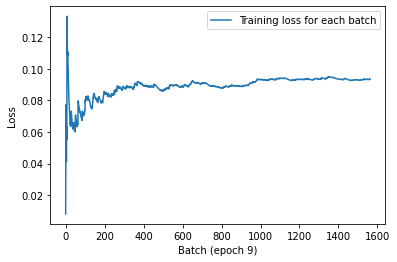

In [16]:
# Creating a custom callback by subclassing the Callback class
# Standard workflow: .compile(), .fit(), .evaluate(), .predict() 
def listing7_20():
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    import matplotlib.pyplot as plt
    
    print("Starting..")
    
    
    def get_mnist_model():
        inputs = keras.Input(shape=(28 * 28,))
        features = layers.Dense(512, activation="relu")(inputs)
        features = layers.Dropout(0.5)(features)
        outputs = layers.Dense(10, activation="softmax")(features)
        model = keras.Model(inputs, outputs)
        return model

    
    # Save a list of per-batch loss values during training, 
    # and save a graph of these values at the end of each epoch
    class LossHistory(keras.callbacks.Callback):
        def on_train_begin(self, logs):
            self.per_batch_losses = []
            
        def on_batch_end(self, batch, logs):
            self.per_batch_losses.append(logs.get("loss"))
    
        def on_epoch_end(self, epoch, logs):
            plt.clf()
            plt.plot(
                range(len(self.per_batch_losses)),
                self.per_batch_losses,
                label="Training loss for each batch"
            )
            plt.xlabel(f"Batch (epoch {epoch})")
            plt.ylabel("Loss")
            plt.legend()
            plt.savefig(f"plot_at_epoch_{epoch}")
            self.per_batch_losses = []
    
    
    (images, labels), (test_images, test_labels) = mnist.load_data()
    images = images.reshape((60000, 28 * 28)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
    train_images, val_images = images[10000:], images[:10000]
    train_labels, val_labels = labels[10000:], labels[:10000]

    callbacks_list = [
        # interrupt training when improvement stops
        keras.callbacks.EarlyStopping(
            # monitor model's validation accuracy
            monitor="accuracy",
            # interrupt training when accuracy stopped improving for more than 1 epoch
            patience=1,
        ),
        # save current weights after every epoch
        keras.callbacks.ModelCheckpoint(
            filepath="plots/chp7_checkpoint_path.keras",
            monitor="val_loss",
            save_best_only=True,
        )
    ]
    
    model = get_mnist_model()
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        # since we monitor accuracy, must be part of the metrics here
        metrics=["accuracy"]
    )
    
    model.fit(
        train_images, 
        train_labels,
        epochs=10,
        callbacks=[LossHistory(), callbacks_list],  #callbacks_list,
        validation_data=(val_images, val_labels),
        verbose=2
    )
    
    #test_metrics = model.evaluate(test_images, test_labels)
    #predictions = model.predict(test_images)

listing7_20()

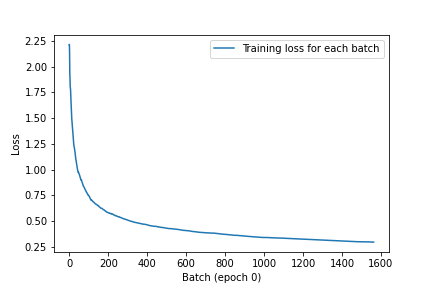

------------------------------------------------------


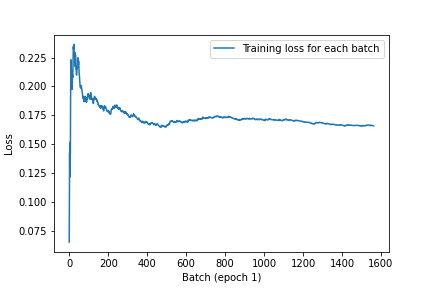

------------------------------------------------------


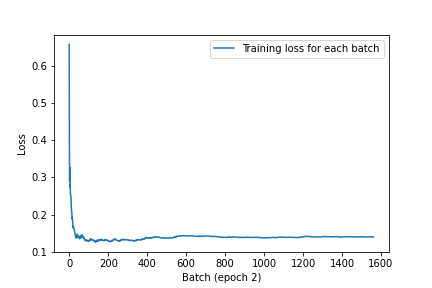

------------------------------------------------------


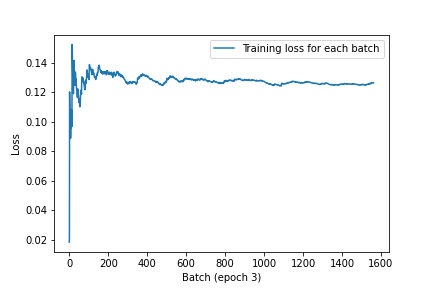

------------------------------------------------------


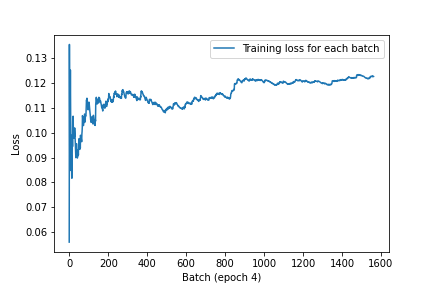

------------------------------------------------------


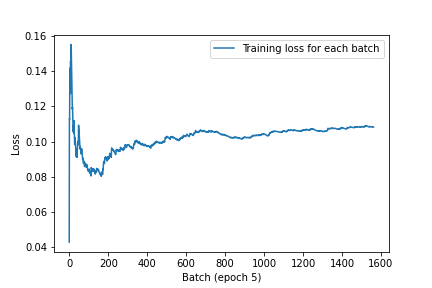

------------------------------------------------------


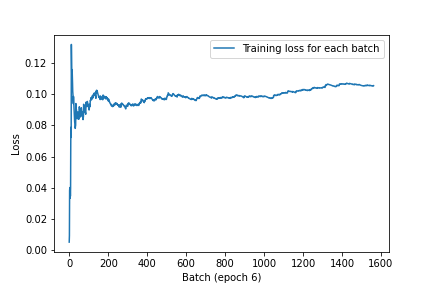

------------------------------------------------------


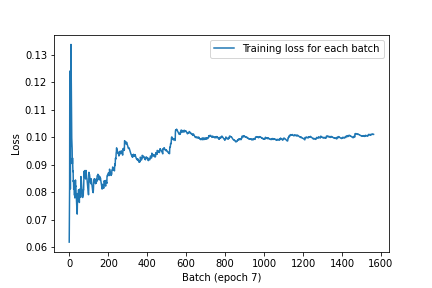

------------------------------------------------------


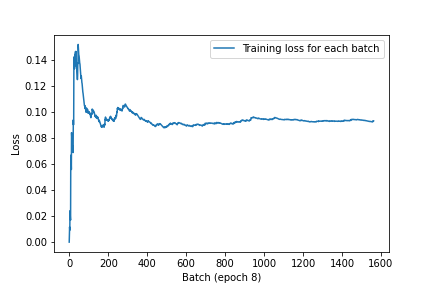

------------------------------------------------------


In [17]:
def show_plots():    
    from IPython.display import Image, display_png
    
    for x in range(0, 9):
        image = (f"plots/plot_at_epoch_{x}.png")
        display_png(Image(image))
        print("------------------------------------------------------")
       
show_plots()

In [ ]:
# Using Tensorboard 
def listing7_21():
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import mnist
    
    print("Starting..")
    
    def get_mnist_model():
        inputs = keras.Input(shape=(28 * 28,))
        features = layers.Dense(512, activation="relu")(inputs)
        features = layers.Dropout(0.5)(features)
        outputs = layers.Dense(10, activation="softmax")(features)
        model = keras.Model(inputs, outputs)
        return model
    
    (images, labels), (test_images, test_labels) = mnist.load_data()
    images = images.reshape((60000, 28 * 28)).astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
    train_images, val_images = images[10000:], images[:10000]
    train_labels, val_labels = labels[10000:], labels[:10000]

    model = get_mnist_model()
    
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    tensorboard = keras.callbacks.TensorBoard(
        log_dir="./tensorboard_logs",
    )
    
    model.fit(
        train_images, 
        train_labels,
        epochs=10,
        callbacks=[tensorboard],
        validation_data=(val_images, val_labels),
        verbose=2
    )
    
listing7_21()

Starting..
Epoch 1/10
1563/1563 - 8s - loss: 0.2921 - accuracy: 0.9126 - val_loss: 0.1461 - val_accuracy: 0.9576
Epoch 2/10
1563/1563 - 7s - loss: 0.1656 - accuracy: 0.9525 - val_loss: 0.1346 - val_accuracy: 0.9643
Epoch 3/10
1563/1563 - 8s - loss: 0.1389 - accuracy: 0.9623 - val_loss: 0.1140 - val_accuracy: 0.9715
Epoch 4/10
1563/1563 - 9s - loss: 0.1251 - accuracy: 0.9682 - val_loss: 0.1134 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 - 7s - loss: 0.1206 - accuracy: 0.9695 - val_loss: 0.1211 - val_accuracy: 0.9724
Epoch 6/10
1563/1563 - 7s - loss: 0.1119 - accuracy: 0.9729 - val_loss: 0.1006 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 - 7s - loss: 0.1073 - accuracy: 0.9747 - val_loss: 0.1141 - val_accuracy: 0.9758
Epoch 8/10
1563/1563 - 7s - loss: 0.1041 - accuracy: 0.9762 - val_loss: 0.1103 - val_accuracy: 0.9775
Epoch 9/10
1563/1563 - 7s - loss: 0.0965 - accuracy: 0.9776 - val_loss: 0.1165 - val_accuracy: 0.9769
Epoch 10/10
1563/1563 - 7s - loss: 0.0913 - accuracy: 0.9787 - val_loss

In [3]:
# https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks
# %load_ext tensorboard
# %tensorboard --logdir tensorboard_logs

---
# UP TO HERE

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with `tf.function`

**Adding a `tf.function` decorator to our evaluation step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging `fit()` with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Chapter summary